# Importando as bibliotecas necessárias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Carregando o arquivo CSV

Fazer o carregamento do arquivo CSV usando o delimitador correto. O arquivo está separado por ";" então usamos sep=';'

In [2]:
# carregar o arquivo CSV
df = pd.read_csv(r'C:\Users\processos1.mg\OneDrive - CREDICAR LOCADORA DE VEICULOS LTDA\Área de Trabalho\Projeto Fipe\projetos aprendizado ML\Preços semestrais - AUTOMOTIVOS_2024.01.csv', sep=';')

# Ver as primeiras linhas do DataFrame
display(df.head(100))

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,NE,AL,ARAPIRACA,COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...,02.817.655/0001-82,RODOVIA AL-220,1901,NaN,SANTA ESMERALDA,57312-025,GASOLINA,01/01/2024,"5,68",NaN,R$ / litro,VIBRA
1,NE,AL,ARAPIRACA,COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...,02.817.655/0001-82,RODOVIA AL-220,1901,NaN,SANTA ESMERALDA,57312-025,GASOLINA ADITIVADA,01/01/2024,"5,68",NaN,R$ / litro,VIBRA
2,NE,AL,ARAPIRACA,COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...,02.817.655/0001-82,RODOVIA AL-220,1901,NaN,SANTA ESMERALDA,57312-025,DIESEL S10,01/01/2024,"5,93",NaN,R$ / litro,VIBRA
3,NE,AL,ARAPIRACA,COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...,02.817.655/0001-82,RODOVIA AL-220,1901,NaN,SANTA ESMERALDA,57312-025,ETANOL,01/01/2024,"3,99",NaN,R$ / litro,VIBRA
4,NE,AL,ARAPIRACA,AUTO POSTO SAO FRANCISCO LTDA,12.706.529/0001-04,RUA SAO FRANCISCO,274,NaN,CENTRO,57300-080,GASOLINA,01/01/2024,"5,48",NaN,R$ / litro,VIBRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,NE,PE,RECIFE,POSTO LEAO DA ILHA LTDA,00.672.715/0001-90,AVENIDA ENGENHEIRO ABDIAS DE CARVALHO,125,0,MADALENA,50750-360,ETANOL,01/01/2024,"3,59",NaN,R$ / litro,RAIZEN
96,NE,PE,RECIFE,AC NORTE LTDA.,05.148.880/0001-61,AVENIDA NORTE,1002,NaN,SANTO AMARO,50040-200,GASOLINA,01/01/2024,"5,08",NaN,R$ / litro,BRANCA
97,NE,PE,RECIFE,AC NORTE LTDA.,05.148.880/0001-61,AVENIDA NORTE,1002,NaN,SANTO AMARO,50040-200,DIESEL S10,01/01/2024,"5,75",NaN,R$ / litro,BRANCA
98,NE,PE,RECIFE,AC NORTE LTDA.,05.148.880/0001-61,AVENIDA NORTE,1002,NaN,SANTO AMARO,50040-200,ETANOL,01/01/2024,"3,57",NaN,R$ / litro,BRANCA


# Pré-processamento dos dados

Vericando e há dados ausentes e se preciso tranformar algumas variáveis:

In [3]:
print(df.isnull().sum())

# Removendo as linhas vazias
#df.dropna(inplace=True)

display(df.head())

Regiao - Sigla            0
Estado - Sigla            0
Municipio                 0
Revenda                   0
CNPJ da Revenda           0
Nome da Rua               0
Numero Rua               65
Complemento          366324
Bairro                  868
Cep                       0
Produto                   0
Data da Coleta            0
Valor de Venda            0
Valor de Compra      477154
Unidade de Medida         0
Bandeira                  0
dtype: int64


,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,NE,AL,ARAPIRACA,COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...,02.817.655/0001-82,RODOVIA AL-220,1901,NaN,SANTA ESMERALDA,57312-025,GASOLINA,01/01/2024,"5,68",NaN,R$ / litro,VIBRA
1,NE,AL,ARAPIRACA,COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...,02.817.655/0001-82,RODOVIA AL-220,1901,NaN,SANTA ESMERALDA,57312-025,GASOLINA ADITIVADA,01/01/2024,"5,68",NaN,R$ / litro,VIBRA
2,NE,AL,ARAPIRACA,COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...,02.817.655/0001-82,RODOVIA AL-220,1901,NaN,SANTA ESMERALDA,57312-025,DIESEL S10,01/01/2024,"5,93",NaN,R$ / litro,VIBRA
3,NE,AL,ARAPIRACA,COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...,02.817.655/0001-82,RODOVIA AL-220,1901,NaN,SANTA ESMERALDA,57312-025,ETANOL,01/01/2024,"3,99",NaN,R$ / litro,VIBRA
4,NE,AL,ARAPIRACA,AUTO POSTO SAO FRANCISCO LTDA,12.706.529/0001-04,RUA SAO FRANCISCO,274,NaN,CENTRO,57300-080,GASOLINA,01/01/2024,"5,48",NaN,R$ / litro,VIBRA


Filtrando as colunas que vou utilizar no modelo

In [5]:
filtrando_df = df[['Produto', 'Municipio', 'Data da Coleta', 'Valor de Venda', 'Bandeira']]
filtrando_df.head()

,Produto,Municipio,Data da Coleta,Valor de Venda,Bandeira
0,GASOLINA,ARAPIRACA,01/01/2024,"5,68",VIBRA
1,GASOLINA ADITIVADA,ARAPIRACA,01/01/2024,"5,68",VIBRA
2,DIESEL S10,ARAPIRACA,01/01/2024,"5,93",VIBRA
3,ETANOL,ARAPIRACA,01/01/2024,"3,99",VIBRA
4,GASOLINA,ARAPIRACA,01/01/2024,"5,48",VIBRA


Convertendo o campo de Data da Coleta em datetime

In [9]:
# Use o método .loc para evitar o SettingWithCopyWarning
filtrando_df.loc[:, 'Data da Coleta'] = pd.to_datetime(filtrando_df['Data da Coleta'], dayfirst=True, errors='coerce')

# Verificar o tipo de dados da coluna 'Data da Coleta'
print(filtrando_df['Data da Coleta'].dtype)


object


Convertendo a coluna de data que está como objeto em datetime para dia, mês e ano em colunas separadas.

In [12]:
# Converter a coluna 'Data da Coleta' para o formato datetime usando .loc
filtrando_df.loc[:, 'Data da Coleta'] = pd.to_datetime(filtrando_df['Data da Coleta'], errors='coerce')

# Criar as novas colunas para 'Dia', 'Mes' e 'Ano' usando .loc
filtrando_df.loc[:, 'Dia'] = filtrando_df.loc[:, 'Data da Coleta'].dt.day
filtrando_df.loc[:, 'Mes'] = filtrando_df.loc[:, 'Data da Coleta'].dt.month
filtrando_df.loc[:, 'Ano'] = filtrando_df.loc[:, 'Data da Coleta'].dt.year

# Retirando a coluna 'Data da Coleta' do modelo
df_2 = filtrando_df.drop(['Data da Coleta'], axis=1)

# Verificar as novas colunas geradas
df_2.head()



,Produto,Municipio,Valor de Venda,Bandeira,Dia,Mes,Ano
0,GASOLINA,ARAPIRACA,"5,68",VIBRA,1,1,2024
1,GASOLINA ADITIVADA,ARAPIRACA,"5,68",VIBRA,1,1,2024
2,DIESEL S10,ARAPIRACA,"5,93",VIBRA,1,1,2024
3,ETANOL,ARAPIRACA,"3,99",VIBRA,1,1,2024
4,GASOLINA,ARAPIRACA,"5,48",VIBRA,1,1,2024


Conferindo o novo DataFrame

In [13]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477154 entries, 0 to 477153
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Produto         477154 non-null  object
 1   Municipio       477154 non-null  object
 2   Valor de Venda  477154 non-null  object
 3   Bandeira        477154 non-null  object
 4   Dia             477154 non-null  int32 
 5   Mes             477154 non-null  int32 
 6   Ano             477154 non-null  int32 
dtypes: int32(3), object(4)
memory usage: 20.0+ MB


# Convertendo a coluna de 'Valor de Venda' object em float

In [14]:
# Substituir vírgulas por pontos
df_2['Valor de Venda'] = df_2['Valor de Venda'].str.replace(',', '.', regex=False)

In [15]:
# Conferindo se a virgula foi substituida pelo ponto.
df_2.head()

,Produto,Municipio,Valor de Venda,Bandeira,Dia,Mes,Ano
0,GASOLINA,ARAPIRACA,5.68,VIBRA,1,1,2024
1,GASOLINA ADITIVADA,ARAPIRACA,5.68,VIBRA,1,1,2024
2,DIESEL S10,ARAPIRACA,5.93,VIBRA,1,1,2024
3,ETANOL,ARAPIRACA,3.99,VIBRA,1,1,2024
4,GASOLINA,ARAPIRACA,5.48,VIBRA,1,1,2024


Agora convertendo a coluna 'Valor de Venda' de object para Float

In [16]:
# Converter a coluna 'Valor de Venda' para float
df_2['Valor de Venda'] = pd.to_numeric(df_2['Valor de Venda'], errors='coerce')

# Verificar se a conversão foi bem-sucedida
print(df_2['Valor de Venda'].dtype)

# Verificando se funcionou sem problema
df_2.head()

float64


,Produto,Municipio,Valor de Venda,Bandeira,Dia,Mes,Ano
0,GASOLINA,ARAPIRACA,5.68,VIBRA,1,1,2024
1,GASOLINA ADITIVADA,ARAPIRACA,5.68,VIBRA,1,1,2024
2,DIESEL S10,ARAPIRACA,5.93,VIBRA,1,1,2024
3,ETANOL,ARAPIRACA,3.99,VIBRA,1,1,2024
4,GASOLINA,ARAPIRACA,5.48,VIBRA,1,1,2024


Verificando valores ausentes apos a conversão

In [17]:
# Verificar valores ausentes após a conversão
valores_na = df_2['Valor de Venda'].isna().sum()
print(f"Valores ausentes após a conversão: {valores_na}")

# Exibir linhas com valores ausentes, se houver
if valores_na > 0:
    print("Linhas com valores ausentes após a conversão:")
    print(df_2[df_2['Valor de Venda'].isna()])

Valores ausentes após a conversão: 0


Verificando o resultado da conversão

In [18]:
# Verificar o resultado da conversão
print(df_2['Valor de Venda'].head())
print(df_2['Valor de Venda'].dtype)
df_2.info()

0    5.68
1    5.68
2    5.93
3    3.99
4    5.48
Name: Valor de Venda, dtype: float64
float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477154 entries, 0 to 477153
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Produto         477154 non-null  object 
 1   Municipio       477154 non-null  object 
 2   Valor de Venda  477154 non-null  float64
 3   Bandeira        477154 non-null  object 
 4   Dia             477154 non-null  int32  
 5   Mes             477154 non-null  int32  
 6   Ano             477154 non-null  int32  
dtypes: float64(1), int32(3), object(3)
memory usage: 20.0+ MB


# Análise exploratória dos dados (EDA)

Vou fazer uma análise inicial para entender a distribuição dos preços e a relação entre as variáveis:

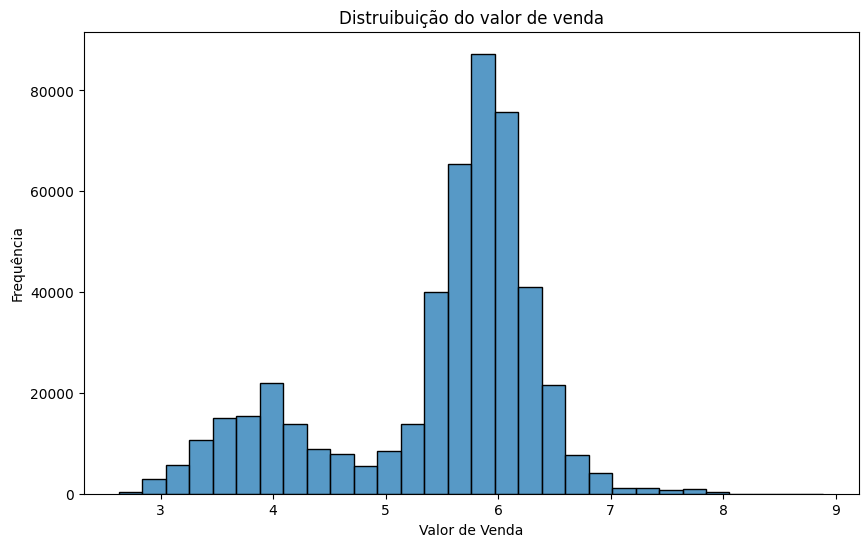

,Valor de Venda,Dia,Mes,Ano
0,5.68,1,1,2024
1,5.68,1,1,2024
2,5.93,1,1,2024
3,3.99,1,1,2024
4,5.48,1,1,2024
...,...,...,...,...
477149,3.99,28,6,2024
477150,5.79,28,6,2024
477151,5.89,28,6,2024
477152,5.64,28,6,2024


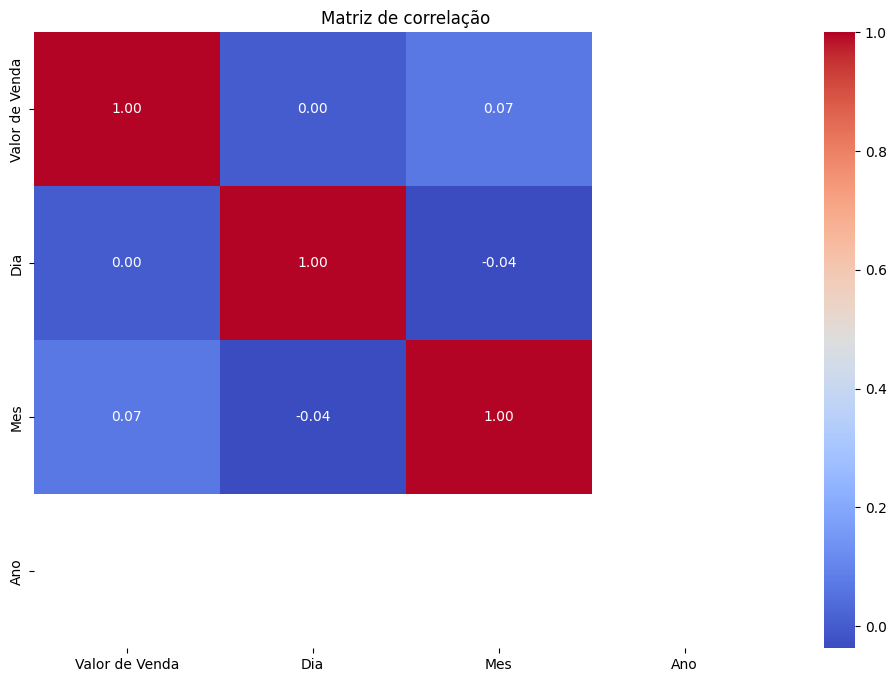

In [19]:
# Histograma do valor de venda
plt.figure(figsize=(10, 6))
sns.histplot(df_2['Valor de Venda'], bins=30)
plt.title('Distruibuição do valor de venda')
plt.xlabel('Valor de Venda')
plt.ylabel('Frequência')
plt.show()


df_numeico = df_2.select_dtypes(include=[float, int])

display(df_numeico)
# Análise de correlação
correlacao = df_numeico.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlacao, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Matriz de correlação')
plt.show()

# Identificado e tratando os outliers
Vou utilizar o grafico Bloxpot para essa verificação

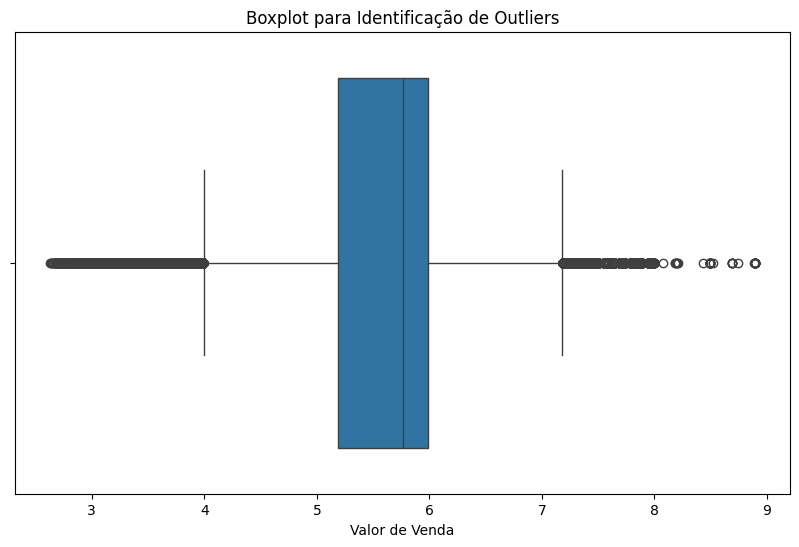

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_2['Valor de Venda'])
plt.title('Boxplot para Identificação de Outliers')
plt.xlabel('Valor de Venda')
plt.show()

Visualizando os valores considerados outliers para tomar decisão se mantenho ou retiro do modelo

In [21]:
# Cálculo de Q1 e Q3
Q1 = df_2['Valor de Venda'].quantile(0.25) # Q1: o primeiro quartil, ou o valor abaixo do qual estão 25% dos dados.
Q3 = df_2['Valor de Venda'].quantile(0.75) # Q3: o terceiro quartil, ou o valor abaixo do qual estão 75% dos dados.

# Cálculo do IQR. (IQR: a diferença entre o terceiro e o primeiro quartil, que representa a amplitude interquartil. Essa é a faixa central dos dados, ou seja, os 50% dos valores.)
IQR = Q3 - Q1

# Definindo limites para outliers
lower_bound = Q1 - 1.5 * IQR # lower_bound: o limite inferior é calculado subtraindo 1,5 vezes o IQR do Q1.
upper_bound = Q3 + 1.5 * IQR # upper_bound: o limite superior é calculado somando 1,5 vezes o IQR ao Q3.

# Filtragem dos outliers:
outliers = df_2[(df_2['Valor de Venda'] < lower_bound) | (df_2['Valor de Venda'] > upper_bound)] # Aqui, o código filtra as linhas do DataFrame df_2 onde o valor de venda é menor que o limite inferior ou maior que o limite superior, identificando assim os outliers.

# Exibição dos outliers:
print("Outliers encontrados:")
print(outliers)

Outliers encontrados:
       Produto        Municipio  Valor de Venda  Bandeira  Dia  Mes   Ano
3       ETANOL        ARAPIRACA            3.99     VIBRA    1    1  2024
9       ETANOL        ARAPIRACA            3.99    BRANCA    1    1  2024
13      ETANOL        ARAPIRACA            3.99  IPIRANGA    1    1  2024
17      ETANOL        RIO LARGO            3.99     VIBRA    1    1  2024
20      ETANOL        RIO LARGO            3.99  IPIRANGA    1    1  2024
...        ...              ...             ...       ...  ...  ...   ...
477062  ETANOL          PALHOCA            3.99       ALE   28    6  2024
477086  ETANOL  TABOAO DA SERRA            3.39    BRANCA   28    6  2024
477090  ETANOL  TABOAO DA SERRA            3.67    BRANCA   28    6  2024
477138  ETANOL      CAMPO LARGO            3.99  IPIRANGA   28    6  2024
477149  ETANOL      CAMPO LARGO            3.99  IPIRANGA   28    6  2024

[71455 rows x 7 columns]


Vou retirar do modelo as 71455 linhas com os outliers

In [22]:
df_cleaned = df_2[(df_2['Valor de Venda'] >= lower_bound) & (df_2['Valor de Venda'] <= upper_bound)]

df_cleaned.head()
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 405699 entries, 0 to 477153
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Produto         405699 non-null  object 
 1   Municipio       405699 non-null  object 
 2   Valor de Venda  405699 non-null  float64
 3   Bandeira        405699 non-null  object 
 4   Dia             405699 non-null  int32  
 5   Mes             405699 non-null  int32  
 6   Ano             405699 non-null  int32  
dtypes: float64(1), int32(3), object(3)
memory usage: 20.1+ MB


# Codificação das Variáveis Categóricas

Transformando as variáveis categóricas em numéricas usando one-hot Encoding

In [28]:
# Codificar variáveis categóricas
df_encoded = pd.get_dummies(df_2, columns=['Produto', 'Municipio', 'Bandeira'], drop_first=True)

df_encoded = df_encoded.astype(int)

# Verificar as colunas após codigicação
df_encoded.head()

,Valor de Venda,Dia,Mes,Ano,Produto_DIESEL S10,Produto_ETANOL,Produto_GASOLINA,Produto_GASOLINA ADITIVADA,Produto_GNV,Municipio_ACAILANDIA,...,Bandeira_SP,Bandeira_STANG,Bandeira_SUL COMBUSTÍVEIS,Bandeira_TAURUS,Bandeira_TDC DISTRIBUIDORA,Bandeira_TEMAPE,Bandeira_TOTALENERGIES,Bandeira_UNI,Bandeira_VIBRA,Bandeira_WALENDOWSKY
0,5,1,1,2024,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,5,1,1,2024,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,5,1,1,2024,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,3,1,1,2024,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,5,1,1,2024,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


# Dividir os dados em conjunto de treino e teste

Separando os dados para treinamento e teste

In [29]:
# Selecionar as variáveis independentes (x) e a dependente (y)
X = df_encoded.drop('Valor de Venda', axis=1) # Todas as colunas exceto a de valor de venda
y = df_encoded['Valor de Venda'] # Aqui temos apenas a coluna que queremos prever

# Dividir em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Visualizando as bases de treino e teste
display(X_train)
display(X_train)
display(y_test)
display(y_train)

,Dia,Mes,Ano,Produto_DIESEL S10,Produto_ETANOL,Produto_GASOLINA,Produto_GASOLINA ADITIVADA,Produto_GNV,Municipio_ACAILANDIA,Municipio_ADAMANTINA,...,Bandeira_SP,Bandeira_STANG,Bandeira_SUL COMBUSTÍVEIS,Bandeira_TAURUS,Bandeira_TDC DISTRIBUIDORA,Bandeira_TEMAPE,Bandeira_TOTALENERGIES,Bandeira_UNI,Bandeira_VIBRA,Bandeira_WALENDOWSKY
417198,5,6,2024,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
65002,24,1,2024,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
189337,11,3,2024,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
473207,26,6,2024,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
299235,22,4,2024,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,8,4,2024,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
365838,16,5,2024,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
131932,19,2,2024,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
146867,26,2,2024,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,Dia,Mes,Ano,Produto_DIESEL S10,Produto_ETANOL,Produto_GASOLINA,Produto_GASOLINA ADITIVADA,Produto_GNV,Municipio_ACAILANDIA,Municipio_ADAMANTINA,...,Bandeira_SP,Bandeira_STANG,Bandeira_SUL COMBUSTÍVEIS,Bandeira_TAURUS,Bandeira_TDC DISTRIBUIDORA,Bandeira_TEMAPE,Bandeira_TOTALENERGIES,Bandeira_UNI,Bandeira_VIBRA,Bandeira_WALENDOWSKY
417198,5,6,2024,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
65002,24,1,2024,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
189337,11,3,2024,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
473207,26,6,2024,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
299235,22,4,2024,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,8,4,2024,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
365838,16,5,2024,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
131932,19,2,2024,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
146867,26,2,2024,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


337000    5
218964    4
221381    3
399804    5
75378     5
         ..
164619    4
37291     5
257854    4
105123    6
24892     3
Name: Valor de Venda, Length: 143147, dtype: int32

417198    6
65002     5
189337    5
473207    5
299235    4
         ..
259178    5
365838    4
131932    6
146867    5
121958    5
Name: Valor de Venda, Length: 334007, dtype: int32

# Modelagem Preditiva

Treinando um modelo de regressão linear

In [30]:
# Treinamento do modelo de Regressão Linear
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Previsões no conjunto de teste
y_pred_lr = lr_model.predict(X_test)

# Avaliação do Modelo
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Regressão Linear - MSE: {mse_lr:.2f}")
print(f"Regressão Linear - : R²{r2_lr:.2f}")

Regressão Linear - MSE: 0.17
Regressão Linear - : R²0.82


# Utilizando o modelo de Árvore de Decisão

Treinando o modelo de árvore de decisão

In [31]:
# Treinamento do modelo de Árvore de Decisão
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Previsões no conjunto de teste
y_pred_dt = dt_model.predict(X_test)

# Avaliação do modelo
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Árvore de Decisão - MSE: {mse_dt:.2f}")
print(f"Árvore de decisão - R²: {r2_dt:.2f}")

Árvore de Decisão - MSE: 0.13
Árvore de decisão - R²: 0.86


# Visualizando a Árvore de decisão

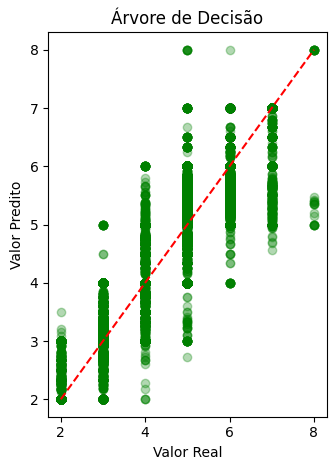

In [32]:
# Gráfico de dispersão para Árvore de Decisão
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_dt, alpha=0.3, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Valor Real')
plt.ylabel('Valor Predito')
plt.title('Árvore de Decisão')

plt.tight_layout()
plt.show()

# Visualizar o resultado da previsão e os valores reais na tela

In [33]:
# Criar um DataFrame com os valores reais e previstos
resultados = pd.DataFrame({
    'Valor Real': y_test,
    'Valor Predito (Regressão Linear)': y_pred_lr,
    'Valor Predito (Árvore de Decisão)': y_pred_dt
})

# Resetar o índice para uma visualização mais limpa
resultados.reset_index(drop=True, inplace=True)

# Arredondar as colunas para duas casas decimais
resultados['Valor Predito (Regressão Linear)'] = resultados['Valor Predito (Regressão Linear)'].round(2)

# Exibir o DataFrame
display(resultados)

# Abaixo podemos visualizar os valores da Regressão Linear que teve uma acuracia inferior ao modelo de Árvore de Decisão

,Valor Real,Valor Predito (Regressão Linear),Valor Predito (Árvore de Decisão)
0,5,5.35,5.25
1,4,3.74,4.00
2,3,3.30,3.00
3,5,5.16,5.00
4,5,5.46,5.00
...,...,...,...
143142,4,4.29,4.00
143143,5,5.17,6.00
143144,4,4.04,4.00
143145,6,6.03,6.00


# Calculando os erros dos modelos

In [45]:
# Calcular o erro absoluto
resultados['Erro Absoluto (Regressão Linear)'] = abs(resultados['Valor Real'] - resultados['Valor Predito (Regressão Linear)'])
resultados['Erro Absoluto (Árvore de Decisão)'] = abs(resultados['Valor Real'] - resultados['Valor Predito (Árvore de Decisão)'])

# Calcular o erro percentual
resultados['Erro Percentual (Regressão Linear)'] = round((resultados['Erro Absoluto (Regressão Linear)'] / resultados['Valor Real']) * 100, 2)
resultados['Erro Percentual (Árvore de Decisão)'] = (resultados['Erro Absoluto (Árvore de Decisão)'] / resultados['Valor Real']) * 100

# Exibir os resultados com erros
display(resultados)

,Valor Real,Valor Predito (Regressão Linear),Valor Predito (Árvore de Decisão),Erro Absoluto (Regressão Linear),Erro Absoluto (Árvore de Decisão),Erro Percentual (Regressão Linear),Erro Percentual (Árvore de Decisão),Erro Percentual (Árvore de Decisão %),Erro Percentual (Regressão Linear %),Erro Percentual (Regressão Linear ),Erro Percentual (Árvore de Decisão )
0,5,5.35,5.25,0.35,0.25,7.00,5.0,5.0,7.00,7.00,5.0
1,4,3.74,4.00,0.26,0.00,6.50,0.0,0.0,6.50,6.50,0.0
2,3,3.30,3.00,0.30,0.00,10.00,0.0,0.0,10.00,10.00,0.0
3,5,5.16,5.00,0.16,0.00,3.20,0.0,0.0,3.20,3.20,0.0
4,5,5.46,5.00,0.46,0.00,9.20,0.0,0.0,9.20,9.20,0.0
...,...,...,...,...,...,...,...,...,...,...,...
143142,4,4.29,4.00,0.29,0.00,7.25,0.0,0.0,7.25,7.25,0.0
143143,5,5.17,6.00,0.17,1.00,3.40,20.0,20.0,3.40,3.40,20.0
143144,4,4.04,4.00,0.04,0.00,1.00,0.0,0.0,1.00,1.00,0.0
143145,6,6.03,6.00,0.03,0.00,0.50,0.0,0.0,0.50,0.50,0.0


# Testando mais dois modelos 



# Ramdom Forest Regressor

O Ramdom Forest Regressor Ele funciona criando um grande número de árvores de decisão independentes, cada uma treinada em diferentes amostras de dados e subconjuntos de características. A previsão final é a média dos resultados de todas as árvores.

In [48]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Parâmetros para Random Forest
rf_model = RandomForestRegressor(
    n_estimators=100,  # Número de árvores na floresta
    max_depth=10,      # Profundidade máxima de cada árvore
    min_samples_split=2,  # Número mínimo de amostras para dividir um nó
    min_samples_leaf=1,    # Número mínimo de amostras em um nó folha
    max_features='sqrt',   # Use 'sqrt' em vez de 'auto'
    n_jobs=-1,           # Usar todos os núcleos disponíveis
    random_state=42
)

# Treinamento do modelo de Random Forest
rf_model.fit(X_train, y_train)

# Previsões no conjunto de teste
y_pred_rf = rf_model.predict(X_test)

# Avaliação do modelo
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - MSE: {mse_rf:.2f}")
print(f"Random Forest - R²: {r2_rf:.2f}")

# Atualizar o DataFrame com os valores do Random Forest
resultados['Valor Predito (Random Forest)'] = y_pred_rf

# Arredondar as colunas para duas casas decimais
resultados['Valor Predito (Random Forest)'] = resultados['Valor Predito (Random Forest)'].round(2)

# Exibir o DataFrame atualizado
display(resultados)


Random Forest - MSE: 0.42
Random Forest - R²: 0.55


,Valor Real,Valor Predito (Regressão Linear),Valor Predito (Árvore de Decisão),Erro Absoluto (Regressão Linear),Erro Absoluto (Árvore de Decisão),Erro Percentual (Regressão Linear),Erro Percentual (Árvore de Decisão),Erro Percentual (Árvore de Decisão %),Erro Percentual (Regressão Linear %),Erro Percentual (Regressão Linear ),Erro Percentual (Árvore de Decisão ),Valor Predito (Random Forest)
0,5,5.35,5.25,0.35,0.25,7.00,5.0,5.0,7.00,7.00,5.0,4.99
1,4,3.74,4.00,0.26,0.00,6.50,0.0,0.0,6.50,6.50,0.0,4.14
2,3,3.30,3.00,0.30,0.00,10.00,0.0,0.0,10.00,10.00,0.0,4.10
3,5,5.16,5.00,0.16,0.00,3.20,0.0,0.0,3.20,3.20,0.0,5.02
4,5,5.46,5.00,0.46,0.00,9.20,0.0,0.0,9.20,9.20,0.0,5.05
...,...,...,...,...,...,...,...,...,...,...,...,...
143142,4,4.29,4.00,0.29,0.00,7.25,0.0,0.0,7.25,7.25,0.0,4.57
143143,5,5.17,6.00,0.17,1.00,3.40,20.0,20.0,3.40,3.40,20.0,4.89
143144,4,4.04,4.00,0.04,0.00,1.00,0.0,0.0,1.00,1.00,0.0,4.18
143145,6,6.03,6.00,0.03,0.00,0.50,0.0,0.0,0.50,0.50,0.0,5.19


# Gradient Boosting Regressor

O Gradient Boosting Regressor cria uma série de árvores de decisão sequencialmente, onde cada árvore tenta corrigir os erros cometidos pelas árvores anteriores. O modelo final é uma combinação de todas as árvores, ajustadas de forma iterativa para minimizar o erro. Diferente do Random Forest, que treina árvores de forma independente, o Gradient Boosting constrói as árvores de forma dependente, focando em melhorar áreas onde o modelo inicial falha.

In [50]:
# Parâmetros para Gradient Boosting
gb_model = GradientBoostingRegressor(
    n_estimators=100,  # Número de árvores
    learning_rate=0.1,  # Taxa de aprendizado
    max_depth=3,       # Profundidade máxima das árvores
    min_samples_split=2,  # Número mínimo de amostras para dividir um nó
    min_samples_leaf=1,    # Número mínimo de amostras em um nó folha
    random_state=42
)

# Treinamento do modelo de Gradient Boosting
gb_model.fit(X_train, y_train)

# Previsões no conjunto de teste
y_pred_gb = gb_model.predict(X_test)

# Avaliação do modelo
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting - MSE: {mse_gb:.2f}")
print(f"Gradient Boosting - R²: {r2_gb:.2f}")

# Atualizar o DataFrame com os valores do Random Forest
resultados['Valor Predito (Gradient Boosting Regressor)'] = y_pred_gb

# Arredondar as colunas para duas casas decimais
resultados['Valor Predito (Gradient Boosting Regressor)'] = resultados['Valor Predito (Gradient Boosting Regressor)'].round(2)

# Exibir o DataFrame atualizado
display(resultados)

Gradient Boosting - MSE: 0.21
Gradient Boosting - R²: 0.78


,Valor Real,Valor Predito (Regressão Linear),Valor Predito (Árvore de Decisão),Erro Absoluto (Regressão Linear),Erro Absoluto (Árvore de Decisão),Erro Percentual (Regressão Linear),Erro Percentual (Árvore de Decisão),Erro Percentual (Árvore de Decisão %),Erro Percentual (Regressão Linear %),Erro Percentual (Regressão Linear ),Erro Percentual (Árvore de Decisão ),Valor Predito (Random Forest),Valor Predito (Gradient Boosting Regressort),Valor Predito (Gradient Boosting Regressor)
0,5,5.35,5.25,0.35,0.25,7.00,5.0,5.0,7.00,7.00,5.0,4.99,5.104682,5.10
1,4,3.74,4.00,0.26,0.00,6.50,0.0,0.0,6.50,6.50,0.0,4.14,3.531916,3.53
2,3,3.30,3.00,0.30,0.00,10.00,0.0,0.0,10.00,10.00,0.0,4.10,3.310317,3.31
3,5,5.16,5.00,0.16,0.00,3.20,0.0,0.0,3.20,3.20,0.0,5.02,5.233838,5.23
4,5,5.46,5.00,0.46,0.00,9.20,0.0,0.0,9.20,9.20,0.0,5.05,5.113476,5.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143142,4,4.29,4.00,0.29,0.00,7.25,0.0,0.0,7.25,7.25,0.0,4.57,4.278655,4.28
143143,5,5.17,6.00,0.17,1.00,3.40,20.0,20.0,3.40,3.40,20.0,4.89,5.257148,5.26
143144,4,4.04,4.00,0.04,0.00,1.00,0.0,0.0,1.00,1.00,0.0,4.18,3.537455,3.54
143145,6,6.03,6.00,0.03,0.00,0.50,0.0,0.0,0.50,0.50,0.0,5.19,5.432590,5.43


# Conclusões

# Melhor Modelo: 
A Árvore de Decisão apresentou o menor MSE e o maior $R^2$ sendo o modelo mais eficiente entre os testados. Isso indica que ela consegue capturar bem as relações entre as variáveis, possivelmente incluindo as não lineares.

# Compração Geral:

**Regressão Linear:** Boa para relações lineares, mas pode não captar toda a complexidade dos dados.

**Árvore de Decisão:** Melhor desempenho geral, capturando relações complexas com precisão.

**Random Forest:** Desempenho abaixo do esperado, indicando possíveis problemas de ajuste.

**Gradient Boosting:** Desempenho razoável, mas não tão bom quanto a Árvore de Decisão; poderia ser melhor com ajustes finos de parâmetros.

# Recomendação

Com base nesses resultados, a Árvore de Decisão seria a escolha inicial para esse cenário, mas ajustes e otimizações poderiam melhorar o desempenho do Gradient Boosting, que também é um modelo robusto para dados complexos.

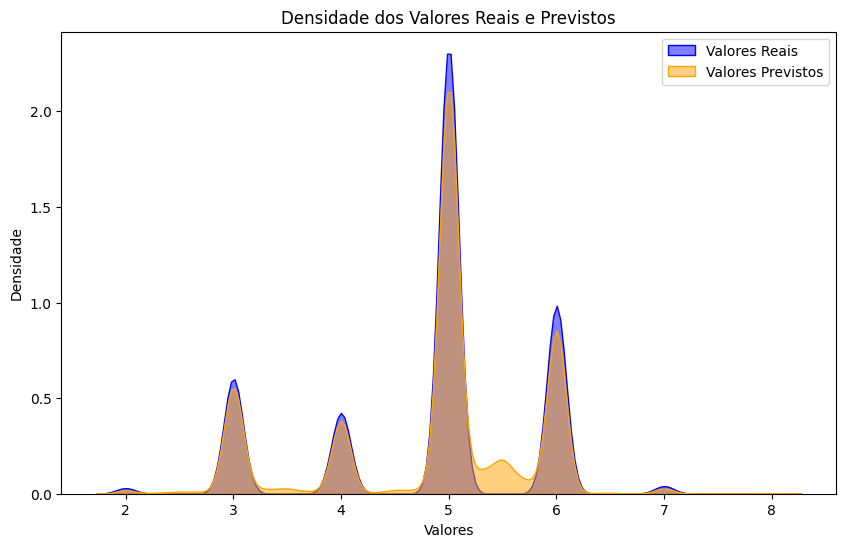

In [52]:
plt.figure(figsize=(10, 6))
sns.kdeplot(y_test, label='Valores Reais', color='blue', fill=True, alpha=0.5)
sns.kdeplot(y_pred_dt, label='Valores Previstos', color='orange', fill=True, alpha=0.5)
plt.title('Densidade dos Valores Reais e Previstos')
plt.xlabel('Valores')
plt.ylabel('Densidade')
plt.legend()
plt.show()

## Créditos e Fontes de Dados

Os dados utilizados nesta análise foram obtidos a partir do [Dados Abertos Governo Federal](https://dados.gov.br/home). Agradecemos por disponibilizar as informações que tornaram possível esta análise.

- **Fonte de Dados**: [Dados Abertos Governo Federal](https://dados.gov.br/dados/conjuntos-dados/serie-historica-de-precos-de-combustiveis-e-de-glp)
- **Data de Acesso**: 23 de Outubro de 2024

Agradecimentos especiais a todos os colaboradores que contribuíram para a coleta e disponibilização desses dados.
